In [1]:
from __future__ import division
import numpy as np

import active
from util import *

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline  
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


from IPython.core.debugger import Tracer; 

In [3]:
N=100
j=14
Neurite=[active.Compartment() for k in range(N)]

Neurite[0].type="sealed"
Neurite[-1].type="killed"  #actually, I don't use it in code 
I_list=[6,8,15,20]
V_list=[]
for I_0 in I_list:
    Neurite[j-1].current=lambda t: I_e_step(I_0,60,t)-I_e_step(I_0,260,t) # j-1 because in python ind are from 0
    Exp=active.Experiment(delta_t=2.5*10**(-2),t_end=400)
    (V,m,h,n)=Exp.voltage(Neurite)
    V_list.append(V)
    
    


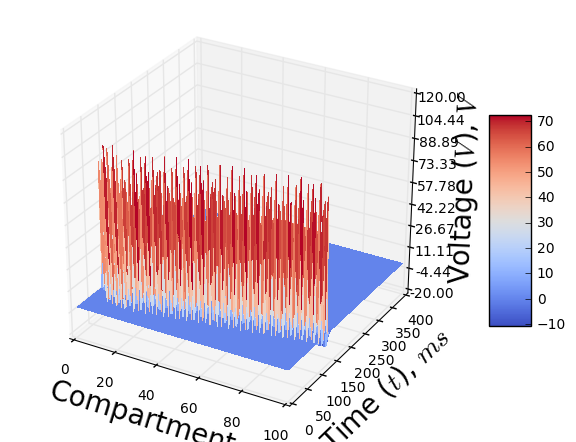

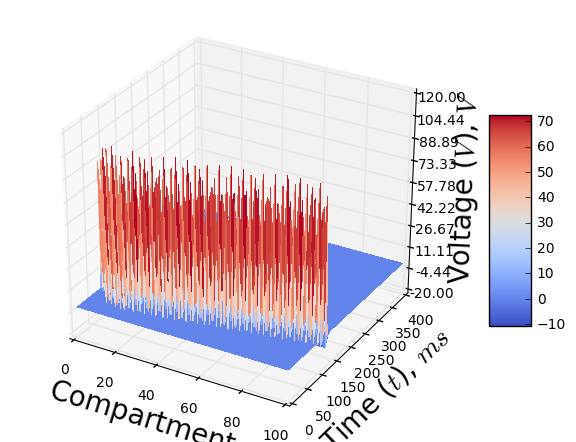

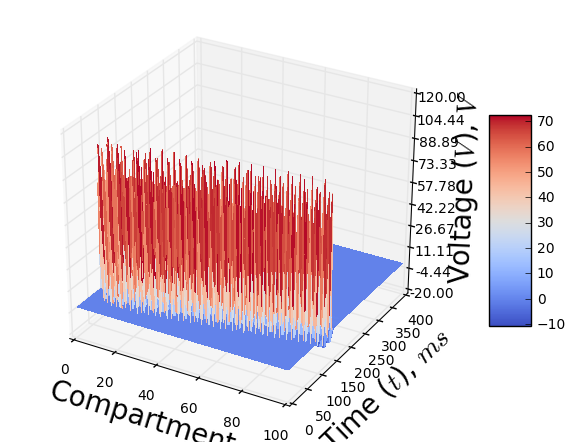

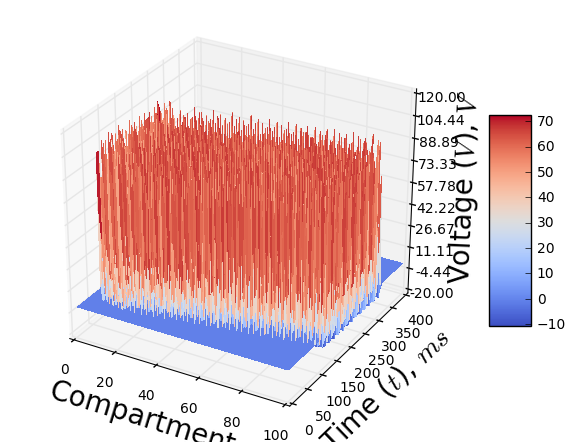

In [15]:
j=1
fig = plt.figure(figsize=(16,12))
for V in V_list:
    
    Y=Exp.t[::50]
    X, Y = np.meshgrid(range(1,N+1),Y)
    V_plot=V[:,::50]
    ax = fig.add_subplot(2, 2, j, projection='3d')
    ax.plot_surface(X, Y, V_plot.T, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)


    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    ax.set_xlabel('Compartment, $j$',fontsize=20)
    ax.set_ylabel('Time ($t$), $ms$',fontsize=20)
    ax.set_zlabel('Voltage ($V$), $V$' ,fontsize=20)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig('figHH'+str(j)+'.pdf', bbox_inches='tight')
    
    plt.show()
    j+=1

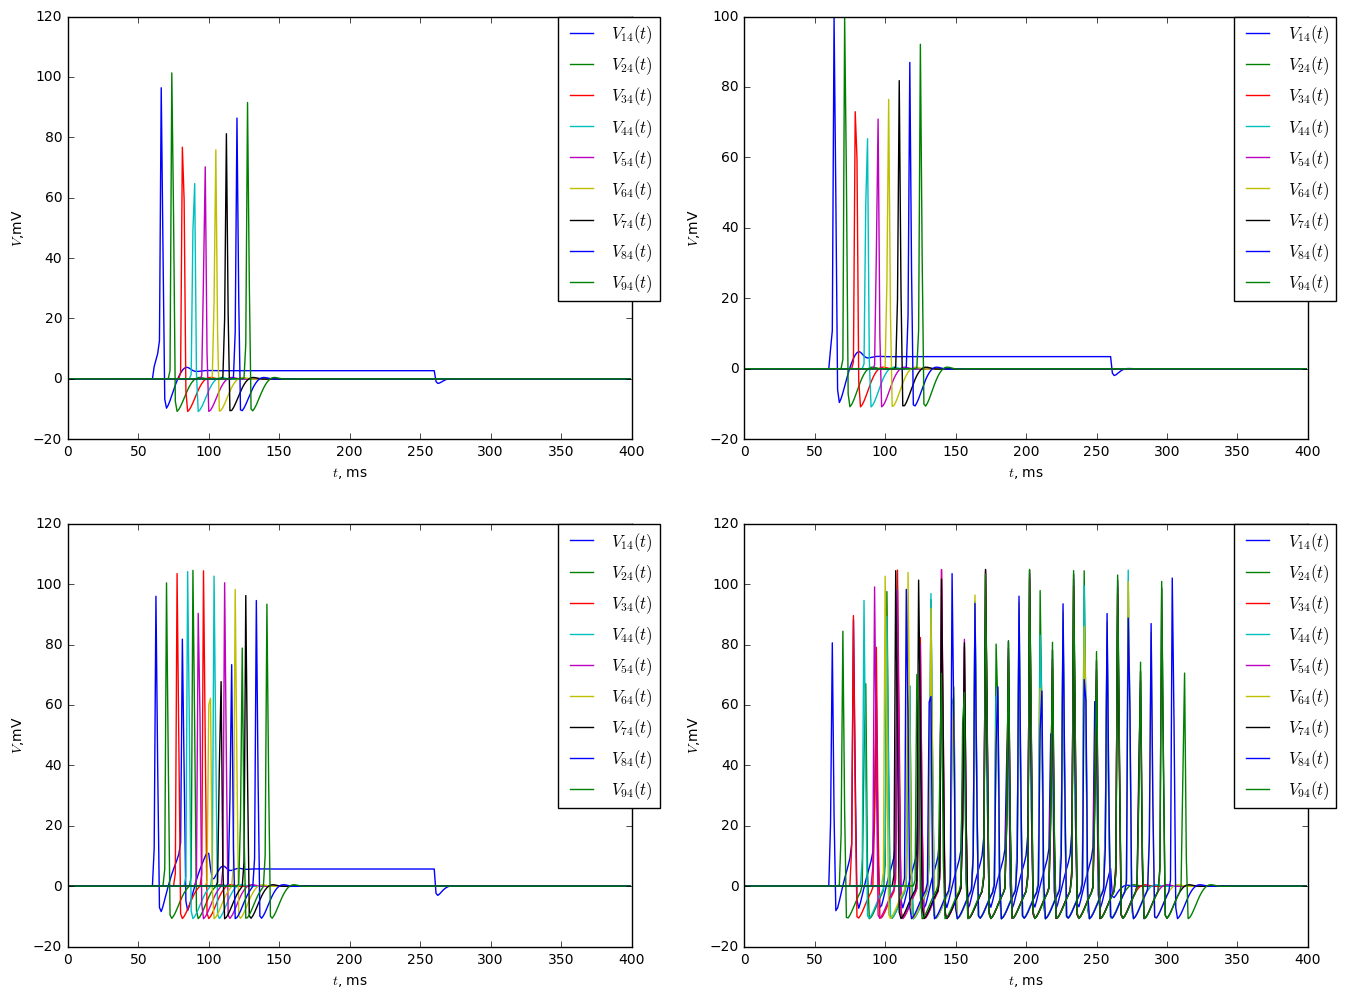

In [21]:
k=1
for V in V_list:
    ax = fig.add_subplot(2, 2, k)
    for j in range(13,100,10):
        X=Exp.t[::50]
        V_plot=V[j,::50]
        plt.figure(1,figsize=(16, 12))
        plt.subplot(2,2,k)
        plt.plot(X,V_plot,label="$V_{"+str(j+1)+"}(t)$")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0)
        plt.xlabel('$t$, ms')
        plt.ylabel('$V$,mV')
    k+=1
#     plt.savefig('exp_1_first_ten_coms.pdf',bbox_inches='tight')


### Chacking of $\alpha$ and $\beta$

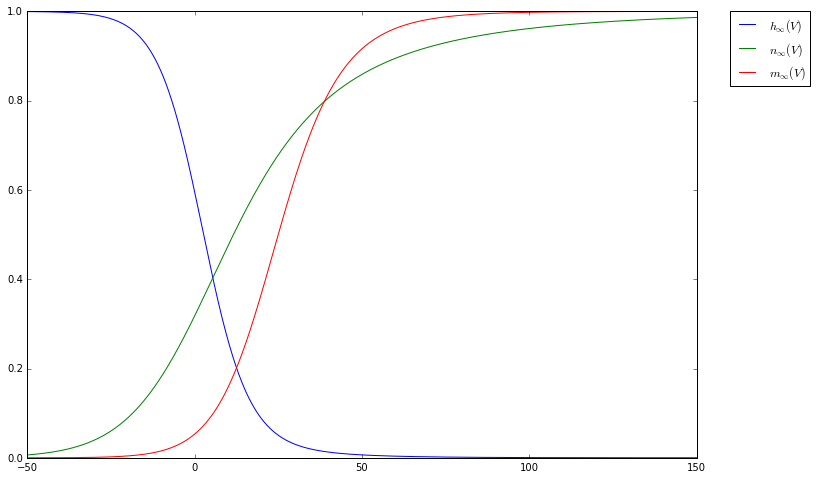

In [36]:
V=np.arange(-50,150,0.1)
a_h=np.vectorize(alpha_h)
b_h=np.vectorize(beta_h)
a_n=np.vectorize(alpha_n)
b_n=np.vectorize(beta_n)
a_m=np.vectorize(alpha_m)
b_m=np.vectorize(beta_m)

plt.figure(figsize=(12,8))
plt.plot(V,a_h(V)/(a_h(V)+b_h(V)),label="$h_{\infty}(V)$")
plt.plot(V,a_n(V)/(a_n(V)+b_n(V)),label="$n_{\infty}(V)$")
plt.plot(V,a_m(V)/(a_m(V)+b_m(V)),label="$m_{\infty}(V)$")
plt.xlabel
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
